# Web Scraping AngelList Company info
***
I have manage to scrape around *5000++* companies from angellist. Each category only allows *20 pages of 20 companies* each to be display at any one time, hence different search items url are used in the scrapping as shown from the file *main.py.*

This section will focus on data cleaning and data visualization.
As my database are store in mongoDb, I will save them as csv file which is in the data folder for user to access the data easily


In [38]:
# importing all the require library
import pandas as pd
import numpy as np
from pymongo import MongoClient 

from bokeh.io import show,output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models.formatters import NumeralTickFormatter
import matplotlib.pyplot as plt

import math
import squarify


#setup MongoDb
client = MongoClient('localhost',27017)
db = client.angelCoScrapeMax
db_singapore = client.angelCoScrapeSingapore

### Total number of companies scrape: 5678 unique companies are scrape out of the 4 mil database from angellist

In [2]:
# Read all mongoDb and write to csv file, this will be uploaded to Github for user to access the sample data easily
allCompanies = list(db.companies.find())
len(allCompanies)

5678

### Check whether number tally using unique function

In [3]:
df_all = pd.DataFrame(allCompanies)
df_all.name.nunique()

5678

In [4]:
df_all.head() #inspecting the sample data

,_id,company_size,joined,location,market,name,pitch,raised,stage,website
0,5da6c2648ecab623b505ef71,11-50,Mar ’11,Melbourne,Web Design,BugHerd,We make the best visual feedback tool for webs...,1481000.0,StageSeries A,Websitebugherd.com
1,5da6c2648ecab623b505ef72,11-50,May ’11,San Francisco,Data Mining,Kaggle,World's largest data science community,11000000.0,StageSeries A,Websitekaggle.com
2,5da6c2648ecab623b505ef73,-,Jan ’12,Oakland,Music,Pandora,Play only music you'll love,NaN,StageIPO,WebsitePandora.com
3,5da6c2648ecab623b505ef74,501-1000,Mar ’12,Boston,Video Streaming,Brightcove,Brightcove Video Cloud is the leading online v...,143000000.0,Stage-,Websitebrightcove.com
4,5da6c2648ecab623b505ef75,-,Jan ’12,Redwood City,Advertising,YuMe,,75800000.0,StageIPO,Websiteyume.com


### Top 5 Location startup based on the data

In [5]:
# Top 3 Countries startup based on the data scrape
df_all_location = pd.value_counts(df_all.location).to_frame()
df_all_location.head()

,location
San Francisco,1352
New York City,540
Singapore,372
-,228
Palo Alto,199


## Data Cleaning

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678 entries, 0 to 5677
Data columns (total 10 columns):
_id             5678 non-null object
company_size    5678 non-null object
joined          5678 non-null object
location        5678 non-null object
market          5678 non-null object
name            5678 non-null object
pitch           5678 non-null object
raised          3381 non-null float64
stage           5678 non-null object
website         5678 non-null object
dtypes: float64(1), object(9)
memory usage: 443.7+ KB


In [7]:
#Upon futher inspection, more cleaning up is require for stage as extra stage is appended to the data
df_all['stage'] = df_all['stage'].str.replace('Stage','',regex = True, n = 1)
#more cleaning up is require for website as extra website is appended to the data
df_all['website'] = df_all['website'].str.replace('Website','',regex = True, n = 1)
#Convert Joined to datetime
df_all['joined'] =  pd.to_datetime(df_all['joined'], format='%b ’%y')
df_all.head()

,_id,company_size,joined,location,market,name,pitch,raised,stage,website
0,5da6c2648ecab623b505ef71,11-50,2011-03-01,Melbourne,Web Design,BugHerd,We make the best visual feedback tool for webs...,1481000.0,Series A,bugherd.com
1,5da6c2648ecab623b505ef72,11-50,2011-05-01,San Francisco,Data Mining,Kaggle,World's largest data science community,11000000.0,Series A,kaggle.com
2,5da6c2648ecab623b505ef73,-,2012-01-01,Oakland,Music,Pandora,Play only music you'll love,NaN,IPO,Pandora.com
3,5da6c2648ecab623b505ef74,501-1000,2012-03-01,Boston,Video Streaming,Brightcove,Brightcove Video Cloud is the leading online v...,143000000.0,-,brightcove.com
4,5da6c2648ecab623b505ef75,-,2012-01-01,Redwood City,Advertising,YuMe,,75800000.0,IPO,yume.com


In [8]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5678 entries, 0 to 5677
Data columns (total 10 columns):
_id             5678 non-null object
company_size    5678 non-null object
joined          5678 non-null datetime64[ns]
location        5678 non-null object
market          5678 non-null object
name            5678 non-null object
pitch           5678 non-null object
raised          3381 non-null float64
stage           5678 non-null object
website         5678 non-null object
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 443.7+ KB


In [9]:
#Writing all Companies to csv file
df_all.to_csv(r'allCompanies.csv')

### I have separately scrape companies based in Singapore, and have managed to get a total of *602* companies, which I might use it to compare data with the *overall data set* in future

In [10]:
allSingaporeCompanies = list(db_singapore.companies.find())
len(allSingaporeCompanies)

602

In [34]:
#inspecting the data for Singapore Companies
df_all_sg = pd.DataFrame(allSingaporeCompanies)
df_all_sg.head() #inspecting the sample data

,_id,company_size,joined,location,market,name,pitch,raised,stage,website
0,5da5cc6587798203da361999,51-200,Jan ’11,Singapore,Credit,DemystData,Data Integration Technology for Financial Serv...,12000000.0,StageSeries B,Websitedemyst.com
1,5da5cc6587798203da36199a,201-500,Nov ’11,Singapore,Brand Marketing,Braze,Braze is a customer engagement platform that d...,175100000.0,StageSeries E,Websitebraze.com
2,5da5cc6587798203da36199b,51-200,Mar ’13,Singapore,Location Based Services,Factual,"Empowering marketers to better understand, rea...",104000000.0,StageClosed,Websitefactual.com
3,5da5cc6587798203da36199c,501-1000,May ’13,Singapore,Advertising,InMobi,The largest independent mobile ad network.,215600000.0,StageSeries C,Websiteinmobi.com
4,5da5cc6587798203da36199d,501-1000,Sep ’12,Singapore,South East Asia,RedMart,SE Asia's Customer-Centric Online Grocer,159659000.0,StageAcquired,Websiteredmart.com


In [12]:
#Upon futher inspection, more cleaning up is require for stage as extra stage is appended to the data
df_all_sg['stage'] = df_all_sg['stage'].str.replace('Stage','',regex = True, n = 1)
#more cleaning up is require for website as extra website is appended to the data
df_all_sg['website'] = df_all_sg['website'].str.replace('Website','',regex = True, n = 1)
#Convert Joined to datetime
df_all_sg['joined'] =  pd.to_datetime(df_all_sg['joined'], format='%b ’%y')
df_all_sg.head()

,_id,company_size,joined,location,market,name,pitch,raised,stage,website
0,5da5cc6587798203da361999,51-200,2011-01-01,Singapore,Credit,DemystData,Data Integration Technology for Financial Serv...,12000000.0,Series B,demyst.com
1,5da5cc6587798203da36199a,201-500,2011-11-01,Singapore,Brand Marketing,Braze,Braze is a customer engagement platform that d...,175100000.0,Series E,braze.com
2,5da5cc6587798203da36199b,51-200,2013-03-01,Singapore,Location Based Services,Factual,"Empowering marketers to better understand, rea...",104000000.0,Closed,factual.com
3,5da5cc6587798203da36199c,501-1000,2013-05-01,Singapore,Advertising,InMobi,The largest independent mobile ad network.,215600000.0,Series C,inmobi.com
4,5da5cc6587798203da36199d,501-1000,2012-09-01,Singapore,South East Asia,RedMart,SE Asia's Customer-Centric Online Grocer,159659000.0,Acquired,redmart.com


In [13]:
df_all_sg.sum()

raised    3.209836e+09
dtype: float64

In [14]:
#Writing all Singapore Companies to csv file
df_all_sg.to_csv(r'allCompanies_sg.csv')

### Number of new startup listed on Angellist year by year

In [15]:
df_all_year =  df_all.joined.dt.year
df_all_year = df_all_year.value_counts().to_frame()
df_all_year = df_all_year.sort_index()
df_all_year
# market_sg_df = df_sg.market.value_counts().to_frame()

,joined
2009,1
2010,119
2011,545
2012,1458
2013,1237
2014,1069
2015,751
2016,363
2017,112
2018,22


In [16]:
df_all_year['year'] = df_all_year.index.astype(str)
df_all_year.year 

2009    2009
2010    2010
2011    2011
2012    2012
2013    2013
2014    2014
2015    2015
2016    2016
2017    2017
2018    2018
2019    2019
Name: year, dtype: object

In [17]:
output_notebook()


p = figure(x_range = df_all_year.year, plot_height = 350,plot_width = 800, title = "Number of companies per year")

p.vbar(x='year',top = 'joined',width=0.9,source=df_all_year)

p.y_range.start = 0

p.xaxis.major_label_orientation = math.pi/5
show(p)

Loading BokehJS ...

### Total number of startup that didn't get any funding : *2297 out of 5678 (40.45%) companies didn't get funding

In [47]:
df_all.raised.isnull().sum()

2297

In [48]:
2297/5678.0 *100

40.45438534695315

# Note ↑
> The above plot shows the limitation of scraping data from Angellist. The search result tends to show ranking by their category *'signal'*. Hence, the audience need to understand the scrape data are bias towards *'strong signal'* companies only.

> Most of the *'strong signal'* companies join Angellist between year *2012 - 2015*

### Finding location with highest fund raised

In [18]:
#'-' is an unknown location  
companies_raised_by_location_df = df_all.groupby('location').sum()
companies_raised_by_location_df.sort_values('raised',ascending=False, inplace=True)
companies_raised_by_location_df.head(10)

,raised
location,
San Francisco,4.364376e+10
New York City,2.028118e+10
Palo Alto,1.400563e+10
Los Angeles,6.511715e+09
Sunnyvale,6.400731e+09
-,6.231525e+09
San Mateo,4.412610e+09
San Jose,4.200295e+09
Boston,3.792828e+09


In [19]:
output_notebook()

p = figure(x_range = list(companies_raised_by_location_df[:20].index), plot_height = 350,plot_width = 800, title = "Raised by Location")

p.vbar(x='location',top = 'raised',width=0.9,source=companies_raised_by_location_df)

p.y_range.start = 0

p.yaxis.formatter = NumeralTickFormatter(format = "($ 0.0 a)")
p.xaxis.major_label_orientation = math.pi/5
show(p)

Loading BokehJS ...

> ### ↑ Singapore rank 13 for fund raise

### Testing with companies raise more than 10 mil

In [20]:
companies_With_10m_Raise_df = df_all[df_all['raised']>10000000]
len(companies_With_10m_Raise_df)

1554

In [21]:
companies_With_10m_Raise_df.iloc[0]

_id                           5da6c2648ecab623b505ef72
company_size                                     11-50
joined                             2011-05-01 00:00:00
location                                 San Francisco
market                                     Data Mining
name                                            Kaggle
pitch           World's largest data science community
raised                                         1.1e+07
stage                                         Series A
website                                     kaggle.com
Name: 1, dtype: object

In [22]:
companies_With_10m_Raise_df.head()

,_id,company_size,joined,location,market,name,pitch,raised,stage,website
1,5da6c2648ecab623b505ef72,11-50,2011-05-01,San Francisco,Data Mining,Kaggle,World's largest data science community,11000000.0,Series A,kaggle.com
3,5da6c2648ecab623b505ef74,501-1000,2012-03-01,Boston,Video Streaming,Brightcove,Brightcove Video Cloud is the leading online v...,143000000.0,-,brightcove.com
4,5da6c2648ecab623b505ef75,-,2012-01-01,Redwood City,Advertising,YuMe,,75800000.0,IPO,yume.com
5,5da6c2648ecab623b505ef76,501-1000,2012-01-01,New York City,Advertising,Mediamath,,205376550.0,Series C,mediamath.com
8,5da6c2648ecab623b505ef79,11-50,2012-06-01,Palo Alto,Social Media Platforms,Mighty Networks,Mighty Networks is the fastest way to create a...,11000000.0,Series A,mightynetworks.com


In [23]:
companies_With_10m_Raise_df.describe()

,raised
count,1.554000e+03
mean,1.120095e+08
std,4.104123e+08
min,1.002500e+07
25%,1.900000e+07
50%,3.600000e+07
75%,7.365000e+07
max,7.505000e+09


### Display companies counts of the same market.  '-' display companies with unknown market type

In [24]:
#Display companies counts of the same market.  '-' display companies with unknown market type
market_all_df = df_all.market.value_counts().to_frame()
market_all_df_top20 = market_all_df[:20]
market_all_df_top20.head(10)

,market
-,501
Data Mining,227
B2B,121
Mobile Commerce,121
SaaS,101
Mobile Games,98
Startups,84
Location Based Services,82
Small and Medium Businesses,75
Technology,71


### Treemap of top 20 Market Type Listed in Angellist

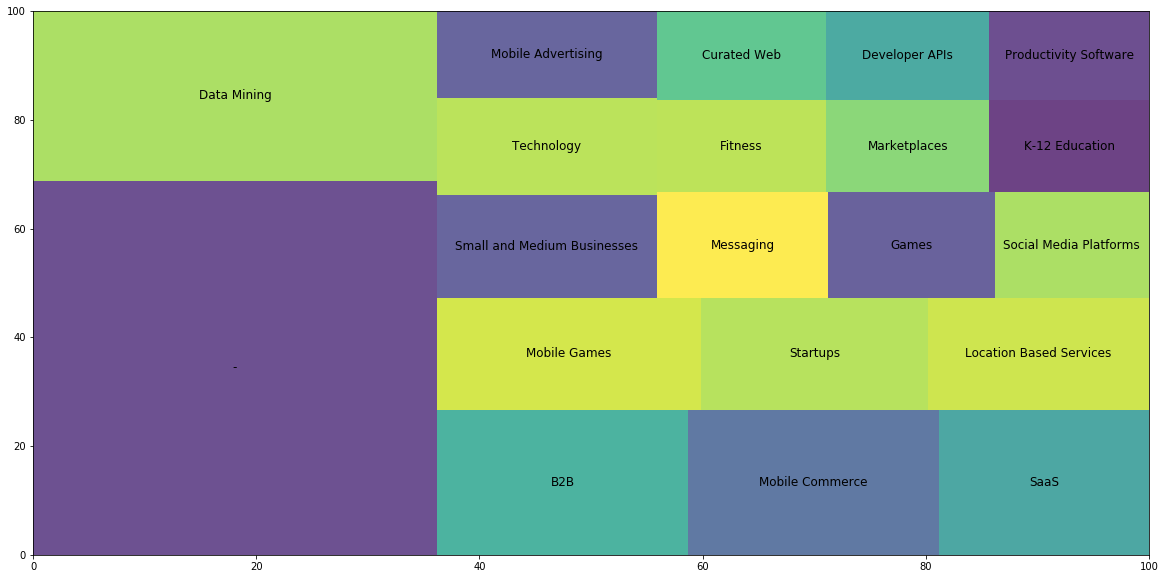

In [25]:
#Treemap visualization for all market.
plt.figure(figsize=(20,10))
squarify.plot(sizes=market_all_df_top20['market'], label=market_all_df_top20.index, alpha=.8, text_kwargs={'fontsize':12})

plt.show()


### Display Treemap for location Singapore only

In [26]:
df_sg = df_all[df_all['location']=='Singapore']
df_sg.head()

,_id,company_size,joined,location,market,name,pitch,raised,stage,website
297,5da6c2668ecab623b505f09a,-,2013-07-01,Singapore,Technology,Infocomm Investments,,NaN,-,infocomminvestments.com
649,5da6c3e69d370b715aed4c2b,,2014-12-01,Singapore,Technology,Far East Ventures,,NaN,-,fareast.ventures
658,5da6c3e69d370b715aed4c34,1-10,2015-10-01,Singapore,-,Amasia,We help our founders get global,NaN,-,amasia.vc
892,5da6c45d9d370b715aed4d1e,51-200,2013-02-01,Singapore,South East Asia,smove,The Apple of Urban Mobility,1050000.0,Seed,smove.sg
901,5da6c81a83093bd0fbc0b6f1,11-50,2015-09-01,Singapore,Licensing,IsItUp Dotcom,Free IT & Software Asset Management + Service ...,NaN,-,IsItUp.com


In [27]:
market_sg_df = df_sg.market.value_counts().to_frame()
market_sg_df_top20 = market_sg_df[:20]
market_sg_df_top20.head(10)

,market
-,29
South East Asia,28
B2B,10
Mobile Commerce,9
Location Based Services,8
Messaging,7
Indonesia,6
Marketplaces,6
Internet of Things,6
Social Travel,5


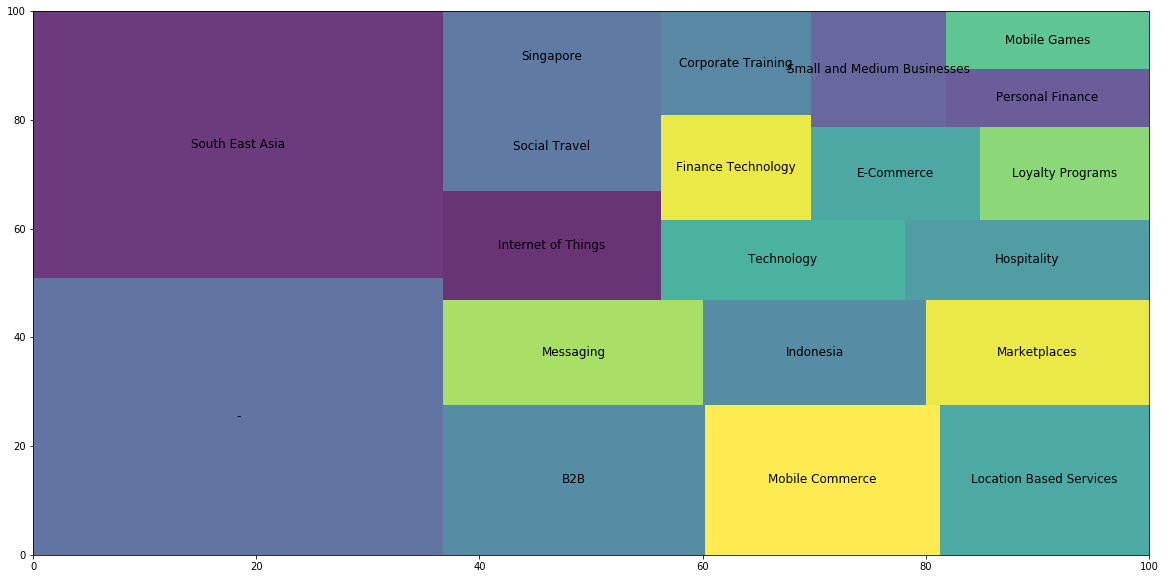

In [28]:
#Treemap visualization for all market.
plt.figure(figsize=(20,10))
squarify.plot(sizes=market_sg_df_top20['market'], label=market_sg_df_top20.index, alpha=.8, text_kwargs={'fontsize':12})

plt.show()

### Groupby Market

In [29]:
#Grouping 
market_df = df_all.groupby('market').sum().reset_index()
#keep only companies that has raised in the top 95 percent quantile
# market_df = market_df[market_df.raised > market_df.raised.quantile(0.95)]
market_df = market_df.sort_values('raised',ascending=False)
market_df_top50 = market_df[:50]
market_df_top50.head(10)

,market,raised
0,-,1.220386e+10
386,Mobile Advertising,9.784142e+09
593,Technology,7.103682e+09
252,Games,6.765409e+09
91,Collaborative Consumption,5.439905e+09
637,Video Streaming,5.231630e+09
394,Mobile Games,3.894324e+09
9,Advertising,3.514737e+09
325,Internet of Things,3.512203e+09
137,Curated Web,3.320833e+09


In [30]:
output_notebook()

p = figure(x_range = market_df_top50.market, plot_height = 350,plot_width = 800, title = "Raised by market")

p.vbar(x='market',top = 'raised',color='grey',width=0.9,source=market_df_top50)

p.y_range.start = 0

p.yaxis.formatter = NumeralTickFormatter(format = "($ 0.0 a)")
p.xaxis.major_label_orientation = math.pi/5
show(p)

Loading BokehJS ...

### Groupby Market for Singapore

In [31]:
#Grouping 
market_sg_df = df_sg.groupby('market').sum().reset_index()
#keep only companies that has raised in the top 95 percent quantile
# market_sg_df = market_sg_df[market_sg_df.raised > market_sg_df.raised.quantile(0.95)]
market_sg_df = market_sg_df.sort_values('raised',ascending=False)
market_sg_df_top50 = market_sg_df[:50]
market_sg_df_top50.head(10)

,market,raised
133,Ride Sharing,730000000.0
48,E-Commerce,502582000.0
148,South East Asia,349053000.0
2,Advertising,215600000.0
14,Brand Marketing,182000000.0
106,Mobile Commerce,140862700.0
43,Developer APIs,137905000.0
0,-,106510000.0
95,Location Based Services,105310000.0
107,Mobile Games,103400000.0


In [32]:
output_notebook()


p = figure(x_range = market_sg_df_top50.market, plot_height = 350,plot_width = 800, title = "Raised by market in Singapore")

p.vbar(x='market',top = 'raised',color='grey',width=0.9,source=market_sg_df_top50)

p.y_range.start = 0

p.yaxis.formatter = NumeralTickFormatter(format = "($ 0.0 a)")
p.xaxis.major_label_orientation = math.pi/5
show(p)

Loading BokehJS ...

### Grouping by Market and location

In [49]:
#Grouping 
market_df = df_all.groupby(['market','location']).sum().reset_index()
#keep only companies that has raised in the top 95 percent quantile
market_df = market_df[market_df.raised > market_df.raised.quantile(0.95)]
market_df = market_df.sort_values('raised',ascending=False)
market_df_top50 = market_df[:50]
market_df_top50.head(10)

,market,location,raised
2060,Mobile Advertising,San Francisco,8.538527e+09
53,-,New York City,7.524540e+09
514,Collaborative Consumption,Palo Alto,5.312500e+09
3087,Technology,San Francisco,4.319580e+09
3258,Video Streaming,Los Angeles,3.843035e+09
1402,Games,San Jose,3.544000e+09
1690,Internet of Things,Palo Alto,3.322300e+09
2133,Mobile Games,Helsinki,3.287600e+09
0,-,-,3.236082e+09
550,Communications Hardware,Sunnyvale,3.030000e+09


In [50]:
market_size_df = market_df_top50['market'].value_counts()
market_size_df.head(10)

Technology                3
Robotics                  2
Curated Web               2
Mobile Advertising        2
Mobile                    2
Video Streaming           2
Games                     2
-                         2
Social Media Marketing    2
Gambling                  1
Name: market, dtype: int64

In [51]:
markets = list(market_df_top50.market.unique())

In [52]:
output_notebook()
# source = ColumnDataSource(market_df)

p = figure(x_range = markets, plot_height = 350,plot_width = 800, title = "Raised by market")

p.vbar(x='market',top = 'raised',color='grey',width=0.9,source=market_df)

p.y_range.start = 0

p.yaxis.formatter = NumeralTickFormatter(format = "($ 0.0 a)")
p.xaxis.major_label_orientation = math.pi/5
show(p)

Loading BokehJS ...